In [28]:
from scipy.stats import norm
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


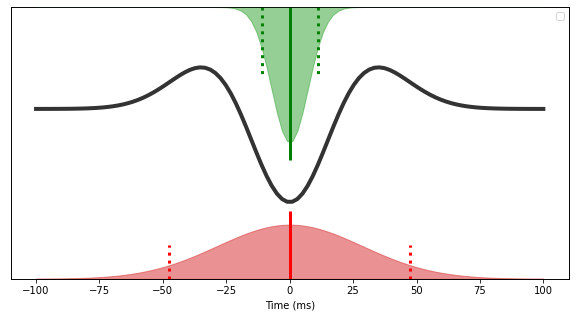

In [134]:
x = np.linspace(-7, 7, 100)
times = np.linspace(-100, 100, 100)
proximal_gaussian = norm.pdf(x, loc=0, scale=2) * 0.8
prox_scale_min = times[np.argmin(np.abs(x - norm.ppf(0.05, loc=0, scale=2)))]
prox_scale_max = times[np.argmin(np.abs(x - norm.ppf(0.95, loc=0, scale=2)))]


distal_gaussian = norm.pdf(x, loc=0, scale=0.5) * 0.5
dist_scale_min = times[np.argmin(np.abs(x - norm.ppf(0.05, loc=0, scale=0.5)))]
dist_scale_max = times[np.argmin(np.abs(x - norm.ppf(0.95, loc=0, scale=0.5)))]
beta_waveform = (signal.ricker(100, 10) * -1) + 0.5

# Set up axis
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
ax1.set_yticks([]), ax2.set_yticks([])
ax1.set_ylim([0,0.8]), ax2.set_ylim([0,0.8])

# Plot beta waveform
ax1.plot(times, beta_waveform, color='black', linewidth=4, alpha=0.8)

# Plot proximal and distal inputs
ax1.fill_between(times, proximal_gaussian, color='C3', alpha=0.5)
ax2.fill_between(times, distal_gaussian, color='C2', alpha=0.5)
ax2.invert_yaxis()

ax1.vlines(0, 0, 0.2, color='red', linewidth=3, linestyle='-')
ax2.vlines(0, 0, 0.45, color='green', linewidth=3, linestyle='-')
ax1.vlines([prox_scale_min, prox_scale_max], 0, 0.1, color='red', linewidth=3, linestyle='dotted')
ax2.vlines([dist_scale_min, dist_scale_max], 0, 0.2, color='green', linewidth=3, linestyle='dotted')


# Labels
ax1.set_xlabel('Time (ms)')
ax1.legend()

In [113]:
times[np.argmin(np.abs(x - norm.ppf(0.95, loc=0, scale=2)))]

47.47474747474749

In [109]:
norm.ppf(0.95, loc=0, scale=2)

3.2897072539029444